# Concrete Strength Prediction

**Dataset description**

Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable

Age(age) -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [4]:
df = pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Exploratory data analysis

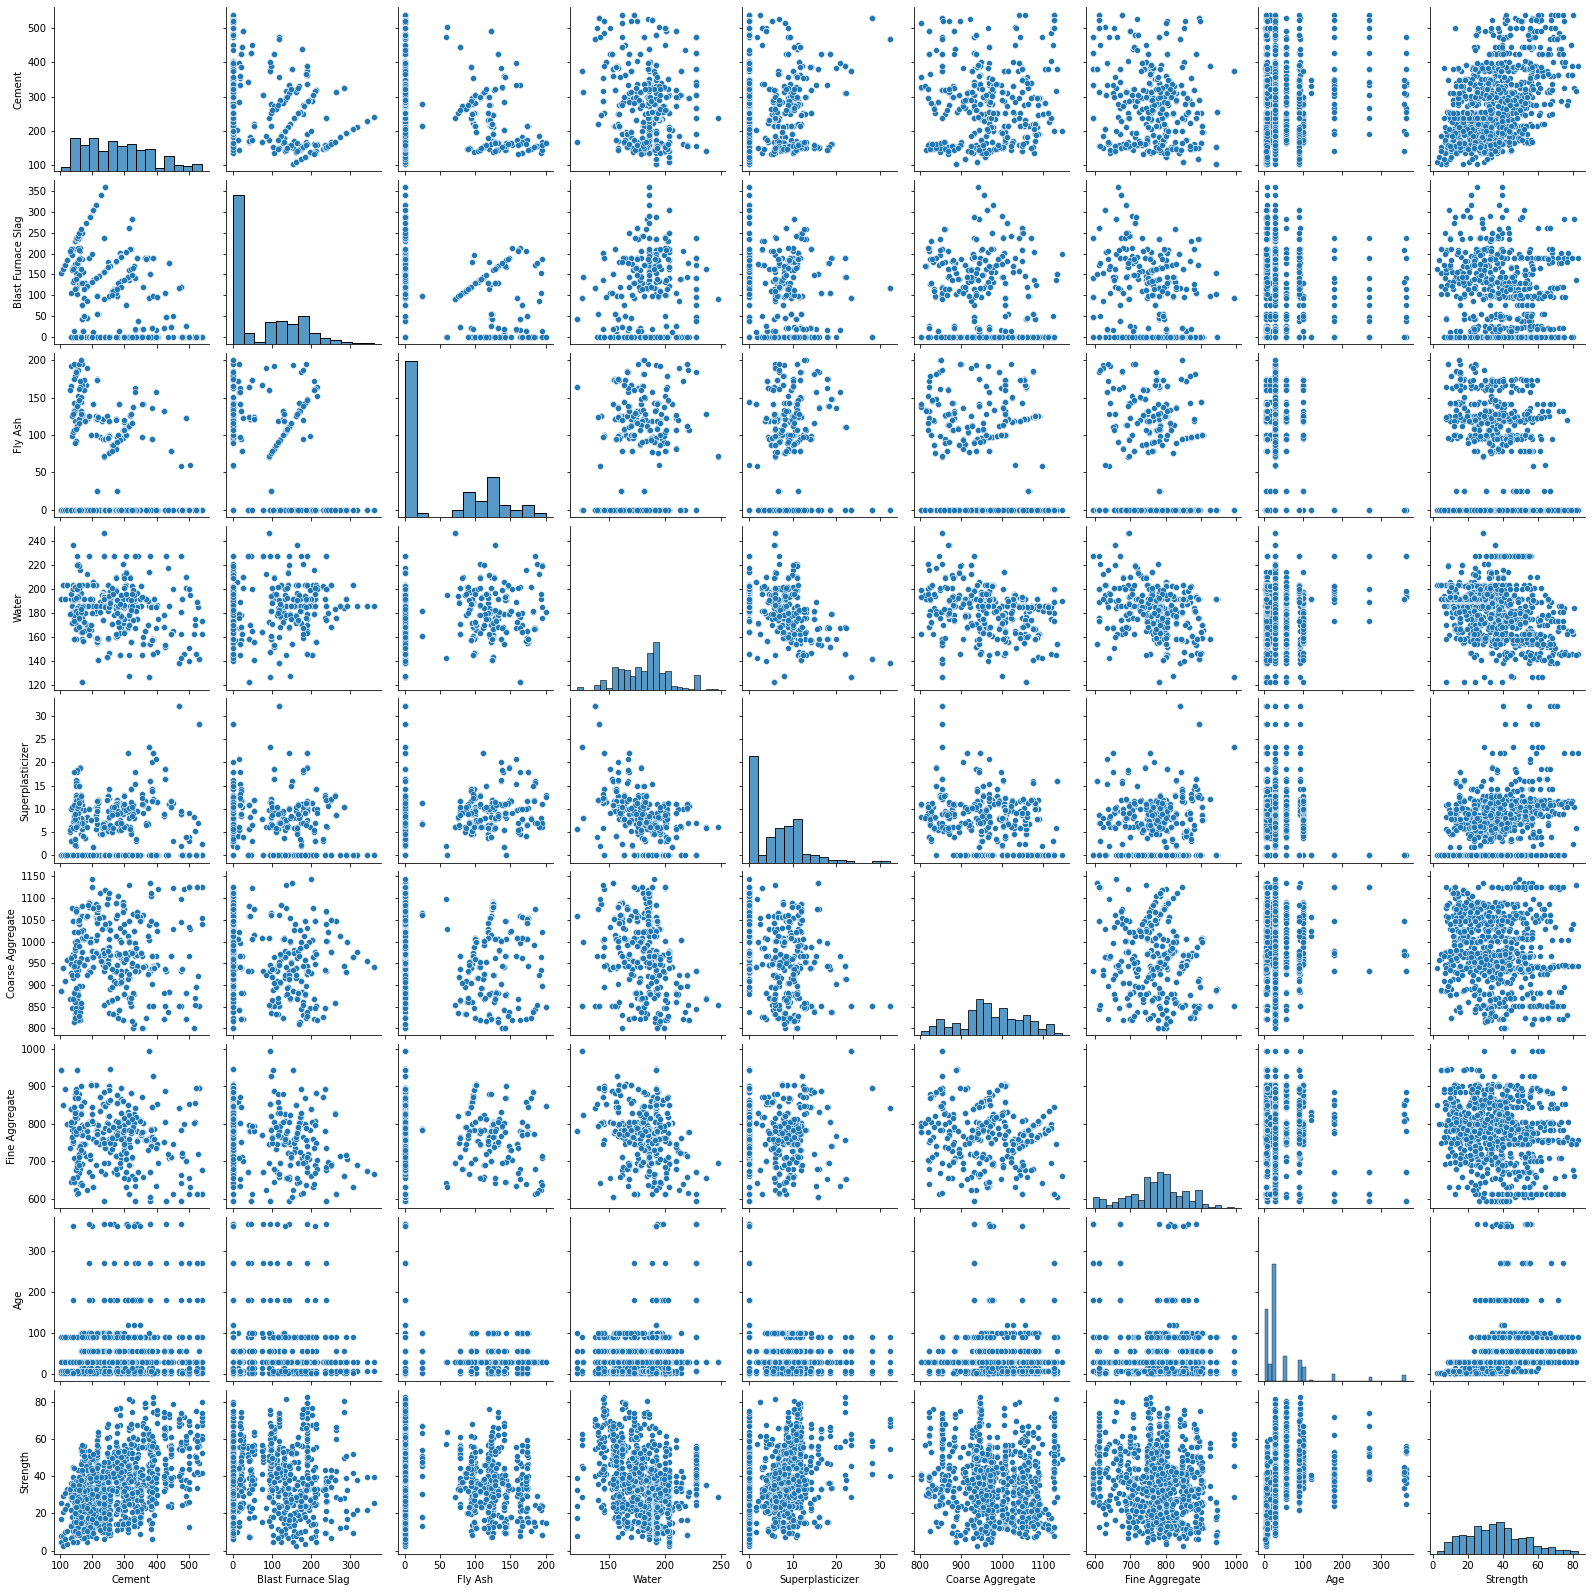

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='Strength'>

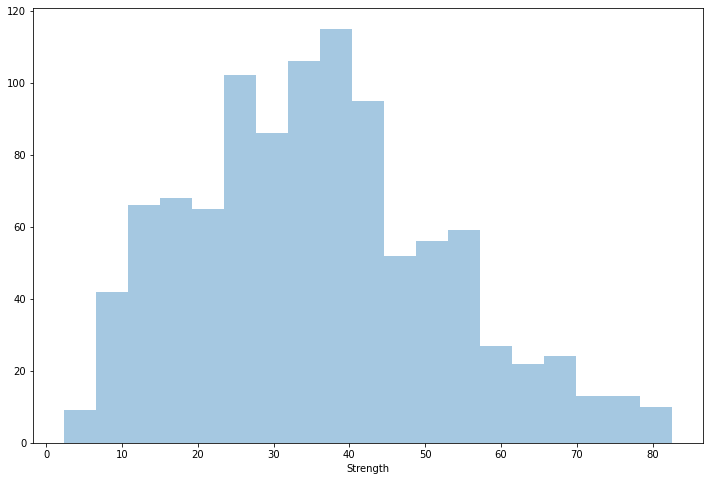

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['Strength'],kde=False)

<AxesSubplot:xlabel='Strength', ylabel='Cement'>

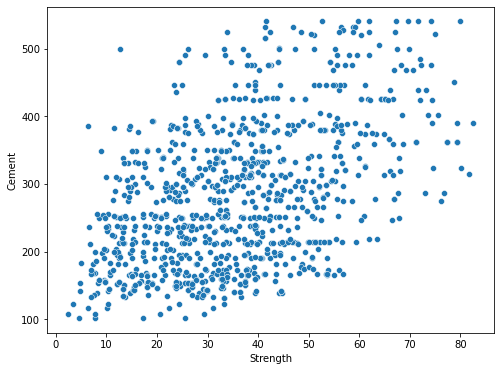

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Strength',y='Cement',data=df)

<AxesSubplot:xlabel='Strength', ylabel='Blast Furnace Slag'>

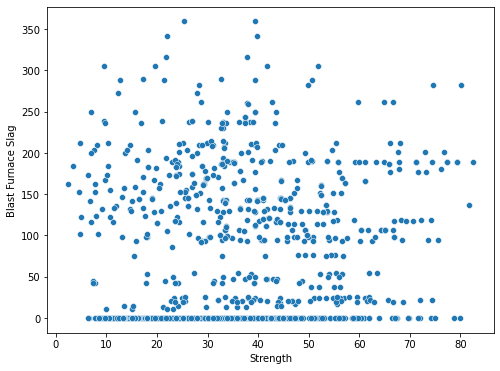

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Strength',y='Blast Furnace Slag',data=df)

<AxesSubplot:xlabel='Strength', ylabel='Fly Ash'>

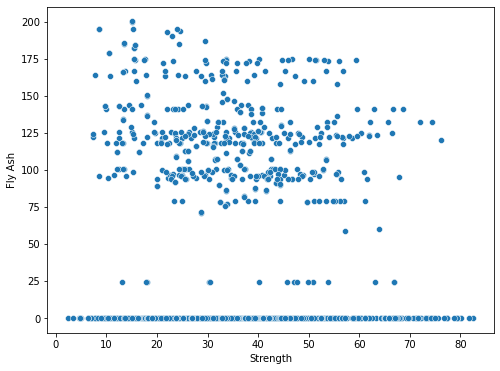

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Strength',y='Fly Ash',data=df)

<AxesSubplot:xlabel='Strength', ylabel='Water'>

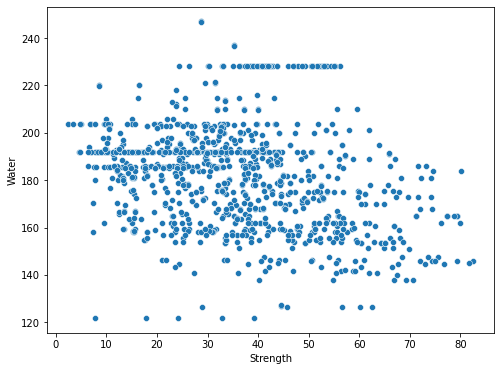

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Strength',y='Water',data=df)

<AxesSubplot:xlabel='Strength', ylabel='Superplasticizer'>

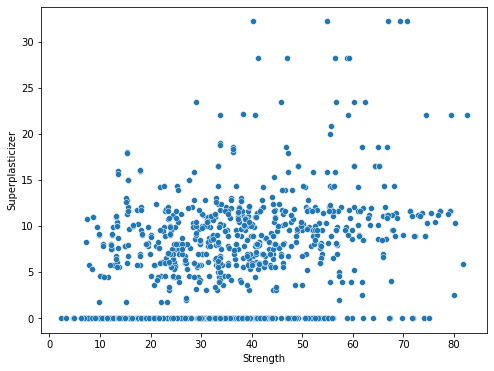

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Strength',y='Superplasticizer',data=df)

<AxesSubplot:>

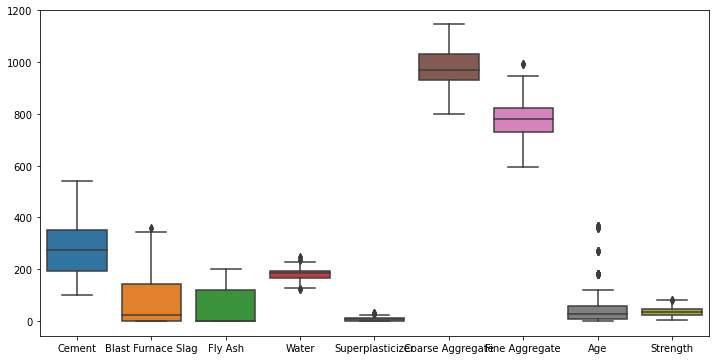

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

In [17]:
df.corr()['Strength'].sort_values()

Water                -0.289633
Fine Aggregate       -0.167241
Coarse Aggregate     -0.164935
Fly Ash              -0.105755
Blast Furnace Slag    0.134829
Age                   0.328873
Superplasticizer      0.366079
Cement                0.497832
Strength              1.000000
Name: Strength, dtype: float64

<AxesSubplot:>

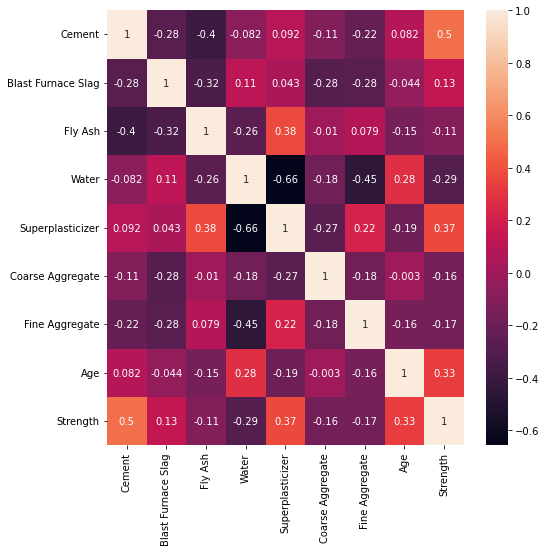

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

# Outliers

In [19]:
from scipy import stats

In [20]:
df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              981 non-null    float64
 1   Blast Furnace Slag  981 non-null    float64
 2   Fly Ash             981 non-null    float64
 3   Water               981 non-null    float64
 4   Superplasticizer    981 non-null    float64
 5   Coarse Aggregate    981 non-null    float64
 6   Fine Aggregate      981 non-null    float64
 7   Age                 981 non-null    int64  
 8   Strength            981 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 76.6 KB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Train and Test Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X= df_new.drop('Strength',axis=1)
y=df_new['Strength']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train= scaler.fit_transform(X_train)

In [29]:
X_test =scaler.transform(X_test)

# Creating a Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()

model.add(Dense(units=9,activation='relu'))
#model.add(Dropout(0.5))
# best values is b/w 0.2 to 0.5


model.add(Dense(units=5,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse')

In [32]:
erly = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=25)

In [33]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test),callbacks=[erly])

In [34]:
loss =pd.DataFrame(model.history.history)

<AxesSubplot:>

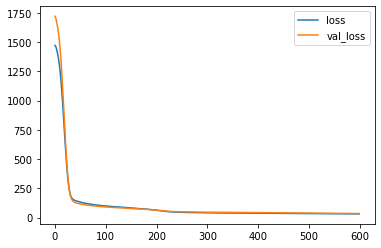

In [35]:
loss.plot()

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_log_error,mean_squared_error

In [38]:
P1=model.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P1)))
print(mean_absolute_error(y_test,P1))
print(mean_squared_error(y_test,P1))
print(r2_score(y_test,P1))

0.17349472177480874
4.402202454387839
34.2450160218556
0.8881517411022906


In [39]:
model = Sequential()

model.add(Dense(units=9,activation='relu'))
model.add(Dropout(0.5))
# best values is b/w 0.2 to 0.5


model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test),callbacks=[erly])

<AxesSubplot:>

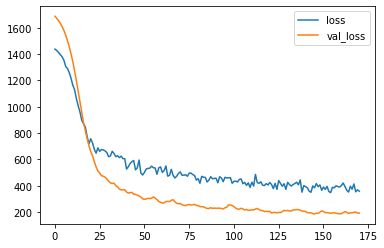

In [42]:
loss =pd.DataFrame(model.history.history)
loss.plot()

In [43]:
P2=model.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P2)))
print(mean_absolute_error(y_test,P2))
print(mean_squared_error(y_test,P2))
print(r2_score(y_test,P2))

0.36190642816187446
11.143856322002893
193.3991614937358
0.36833554197942653


In [44]:
model = Sequential()

model.add(Dense(units=9,activation='relu'))

model.add(Dense(units=5,activation='relu'))

model.add(Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse')


model.fit(x=X_train,y=y_train,epochs=600,verbose=0,validation_data=(X_test,y_test))

<AxesSubplot:>

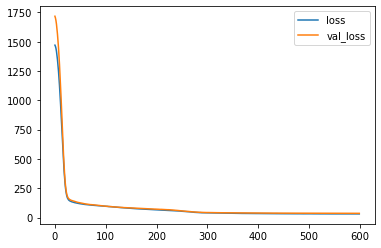

In [45]:
loss =pd.DataFrame(model.history.history)
loss.plot()

In [46]:
P3=model.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P3)))
print(mean_absolute_error(y_test,P3))
print(mean_squared_error(y_test,P3))
print(r2_score(y_test,P3))

0.1742962328956628
4.478321029934181
36.10785558642616
0.8820674875055041
